In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

Evaluate the performance of a simple SVM classifier (SVC) with almost no parameter tuning using cross validation:

In [39]:
rcauc = make_scorer(roc_auc_score)

In [40]:
x_train = pd.read_csv('../data/X_train_filtered.csv', index_col=0)
x_valid = pd.read_csv('../data/X_valid_filtered.csv', index_col=0)
X = np.asarray(pd.concat([x_train, x_valid]))

In [41]:
y_train = pd.read_csv('Y_train.csv', index_col=0)
y_valid = pd.read_csv('Y_valid.csv', index_col=0)
y = np.asarray(pd.concat([y_train, y_valid])).flatten()

In [42]:
auc_scores = []
preds_all = []

pipeline=make_pipeline(SimpleImputer(), StandardScaler(), SVC(C=0.1, class_weight='balanced', verbose=4, probability=True, random_state=10212022))
cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=10212022)

for train_index, test_index in cv.split(X, y):
    pipeline.fit(X[train_index], y[train_index])
    
    preds = pipeline.predict_proba(X[test_index])[:,1]
    auc = roc_auc_score(y[test_index], preds)    
    
    auc_scores.append(auc)
    preds_all.append(preds)
    
    print('==========================')
    print(f'AUC: {auc:.3f}')
    print('==========================')

[LibSVM].........
*
optimization finished, #iter = 9961
obj = -766.432897, rho = -0.704318
nSV = 8965, nBSV = 8281
Total nSV = 8965
.........
*
optimization finished, #iter = 9837
obj = -751.141016, rho = -0.690249
nSV = 8803, nBSV = 8080
Total nSV = 8803
.........
*
optimization finished, #iter = 9771
obj = -744.283652, rho = -0.734282
nSV = 8741, nBSV = 8024
Total nSV = 8741
.........
*
optimization finished, #iter = 9800
obj = -745.941693, rho = -0.699171
nSV = 8765, nBSV = 8028
Total nSV = 8765
.........
*
optimization finished, #iter = 9676
obj = -743.093078, rho = -0.697489
nSV = 8703, nBSV = 7939
Total nSV = 8703
...........
*.
*
optimization finished, #iter = 12341
obj = -927.449553, rho = 0.691824
nSV = 10821, nBSV = 9847
Total nSV = 10821
AUC: 0.793
[LibSVM].........
*
optimization finished, #iter = 9869
obj = -756.361017, rho = -0.735789
nSV = 8864, nBSV = 8165
Total nSV = 8864
.........
*
optimization finished, #iter = 9873
obj = -754.826015, rho = -0.739489
nSV = 8802, nBS

.........
*.
*
optimization finished, #iter = 9999
obj = -746.693529, rho = -0.689184
nSV = 8764, nBSV = 8036
Total nSV = 8764
...........
*.
**.*
optimization finished, #iter = 12488
obj = -939.009824, rho = 0.689030
nSV = 10931, nBSV = 9968
Total nSV = 10931
AUC: 0.833
[LibSVM].........
*.*
optimization finished, #iter = 10009
obj = -773.799087, rho = -0.656825
nSV = 9033, nBSV = 8449
Total nSV = 9033
.........
*
optimization finished, #iter = 9946
obj = -760.433607, rho = -0.687719
nSV = 8909, nBSV = 8200
Total nSV = 8909
.........
*.*
optimization finished, #iter = 10068
obj = -769.181980, rho = -0.710232
nSV = 9005, nBSV = 8391
Total nSV = 9005
.........
*.*
optimization finished, #iter = 10025
obj = -773.985801, rho = -0.714940
nSV = 9026, nBSV = 8411
Total nSV = 9026
.........
*
optimization finished, #iter = 9819
obj = -754.281146, rho = -0.727715
nSV = 8848, nBSV = 8101
Total nSV = 8848
...........
*.*.
*
optimization finished, #iter = 12914
obj = -947.349837, rho = 0.691326
n

.........
*
optimization finished, #iter = 9880
obj = -756.635370, rho = -0.720564
nSV = 8863, nBSV = 8181
Total nSV = 8863
.........
*
optimization finished, #iter = 9868
obj = -755.038959, rho = -0.706833
nSV = 8834, nBSV = 8111
Total nSV = 8834
.........
*
optimization finished, #iter = 9911
obj = -759.669081, rho = -0.684396
nSV = 8884, nBSV = 8176
Total nSV = 8884
...........
*.
**.*
optimization finished, #iter = 12444
obj = -938.298955, rho = 0.693471
nSV = 10921, nBSV = 9952
Total nSV = 10921
AUC: 0.829
[LibSVM].........
*
optimization finished, #iter = 9920
obj = -759.700277, rho = -0.709760
nSV = 8918, nBSV = 8237
Total nSV = 8918
.........
*
optimization finished, #iter = 9900
obj = -755.909998, rho = -0.689288
nSV = 8869, nBSV = 8145
Total nSV = 8869
.........
*
optimization finished, #iter = 9876
obj = -758.778199, rho = -0.711495
nSV = 8873, nBSV = 8193
Total nSV = 8873
.........
*
optimization finished, #iter = 9922
obj = -761.076728, rho = -0.733611
nSV = 8915, nBSV = 8

AUC: 0.857
[LibSVM].........
*
optimization finished, #iter = 9966
obj = -759.820782, rho = -0.640667
nSV = 8902, nBSV = 8206
Total nSV = 8902
.........
*
optimization finished, #iter = 9915
obj = -762.388047, rho = -0.738899
nSV = 8878, nBSV = 8159
Total nSV = 8878
.........
*
optimization finished, #iter = 9835
obj = -750.727676, rho = -0.710124
nSV = 8829, nBSV = 8125
Total nSV = 8829
.........
*
optimization finished, #iter = 9880
obj = -756.136381, rho = -0.710654
nSV = 8869, nBSV = 8142
Total nSV = 8869
.........
*
optimization finished, #iter = 9823
obj = -753.040278, rho = -0.709637
nSV = 8827, nBSV = 8109
Total nSV = 8827
...........
*.
*
optimization finished, #iter = 12378
obj = -935.824821, rho = 0.693455
nSV = 10903, nBSV = 9919
Total nSV = 10903
AUC: 0.825
[LibSVM].........
*.*
optimization finished, #iter = 10016
obj = -769.081959, rho = -0.725125
nSV = 8992, nBSV = 8378
Total nSV = 8992
.........
*
optimization finished, #iter = 9979
obj = -768.013128, rho = -0.711952
n

In [67]:
np.mean(auc_scores), (np.mean(auc_scores) - np.std(auc_scores), np.mean(auc_scores) + np.std(auc_scores))

(0.8344309006587044, '\n', (0.8172341150887024, 0.8516276862287064))

The mean AUC score is 0.834, with a CI of one standard deviation being [0.817, 0.851].

Somewhat useless plots - the ROC curves, the KDE plot for the AUC score distribution and a QQ plot for the AUC score distribution.

The last two plots suggest that the AUC scores are normally distributed.

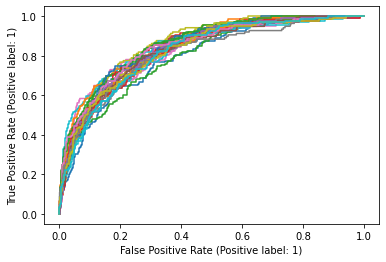

In [73]:
ax = plt.gca()
for i, (_, test_index) in enumerate(cv.split(X, y)):
    RocCurveDisplay.from_predictions(y[test_index], preds_all[i], ax=ax)
ax.get_legend().remove()

<AxesSubplot:ylabel='Density'>

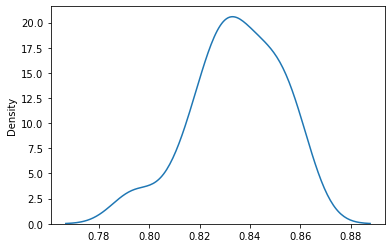

In [58]:
sns.kdeplot(x=auc_scores)

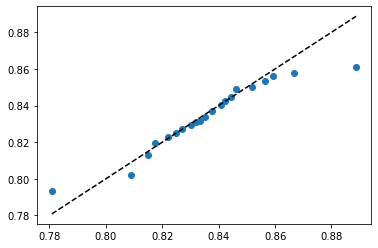

In [65]:
a = np.random.normal(np.mean(auc_scores),np.std(auc_scores),250)

percs = np.linspace(0,100,21)
qn_a = np.percentile(a, percs)
qn_b = np.percentile(np.asarray(auc_scores), percs)

plt.plot(qn_a,qn_b, ls="", marker="o")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")